In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import re
import statistics
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def present(directory):
    
    global avg_scores 
    global max_scores
    global no_solutions

    avg_scores, max_scores, no_solutions = [[]], [[]], [[]]
    
    # access all folders in this dir
    for folder in os.listdir(directory + "/"):
        print("in folder: " + folder)
        for filename in os.listdir(directory + "/" + folder + "/"):
            if filename.startswith("archive"):
                i = int(re.search('archive_(.*).dat', filename).group(1))
                i = int(i / 50) + 1 # add 1 because we can have an archive as 'archive_0.dat'
                
                while(len(avg_scores) < i):
                    avg_scores.append([])
                while(len(max_scores) < i):
                    max_scores.append([])
                while(len(no_solutions) < i):
                    no_solutions.append([])
                    
                z = np.loadtxt(directory + "/" + folder + "/" + filename, unpack=True)[7]
                avg_scores[i-1].append(statistics.mean(z))
                max_scores[i-1].append(max(z))
                no_solutions[i-1].append(len(z))
                
                
    if not os.path.exists(directory + "/plots/"):    
        os.mkdir(directory + "/plots/")
        
    global avg_lower 
    global avg_upper
    global mean_avg
    
    avg_lower, avg_upper, mean_avg = [],[],[]
    
    for i in range(len(avg_scores)):
        m,l,u = mean_confidence_interval(avg_scores[i])
        avg_lower.append(l)
        avg_upper.append(u)
        mean_avg.append(m)
        
    fig = plt.figure(figsize=(14,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    
    # axes.boxplot(avg_scores)
    axes.plot(mean_avg, 'g')
    plt.title("Avg covered distance over generations")
    x = np.linspace(0, len(mean_avg), len(mean_avg))
    axes.fill_between(x, avg_lower, avg_upper, color='lightgreen')
    plt.ylabel("avg covered distance in 5s")
    plt.xlabel("generation/50")
    axes.set_ylim([0,12])
    plt.grid()
    plt.savefig(directory + "/plots/avgscore.png")
    plt.show()

    global max_lower 
    global max_upper
    global mean_max
    
    max_lower, max_upper, mean_max = [],[],[]
    
    for i in range(len(max_scores)):
        m,l,u = mean_confidence_interval(max_scores[i])
        max_lower.append(l)
        max_upper.append(u)
        mean_max.append(m)
    
    fig = plt.figure(figsize=(14,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    #axes.boxplot(max_scores)
    axes.plot(mean_max, 'r')
    x = np.linspace(0, len(mean_max), len(mean_max))
    axes.fill_between(x, max_lower, max_upper, color='lightcoral')
    axes.set_ylim([0,12])
    plt.title("Max covered distance over generations")
    plt.ylabel("max covered distance in 5s")
    plt.xlabel("generation/50")
    plt.grid()
    plt.savefig(directory + "/plots/maxscore.png")
    plt.show()

    global no_lower 
    global no_upper
    global mean_no
    
    no_lower, no_upper, mean_no = [],[],[]
    
    for i in range(len(no_solutions)):
        m,l,u = mean_confidence_interval(no_solutions[i])
        no_lower.append(l)
        no_upper.append(u)
        mean_no.append(m)
    
    fig = plt.figure(figsize=(20,5))
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    # axes.boxplot(no_solutions)
    axes.plot(mean_no, 'b')
    x = np.linspace(0, len(mean_no), len(mean_no))
    axes.fill_between(x, no_lower, no_upper,color='skyblue')
    plt.ylabel("no solutions")
    plt.title("Avg no. solutions over generations")
    axes.set_ylim([0,15000])

    plt.xlabel("generation/50")
    plt.grid()
    plt.savefig(directory + "/plots/numsolutions.png")
    plt.show()


in folder: 1
in folder: 5
in folder: 4
in folder: iterations
in folder: plots
in folder: 2
in folder: 3
in folder: iteresults


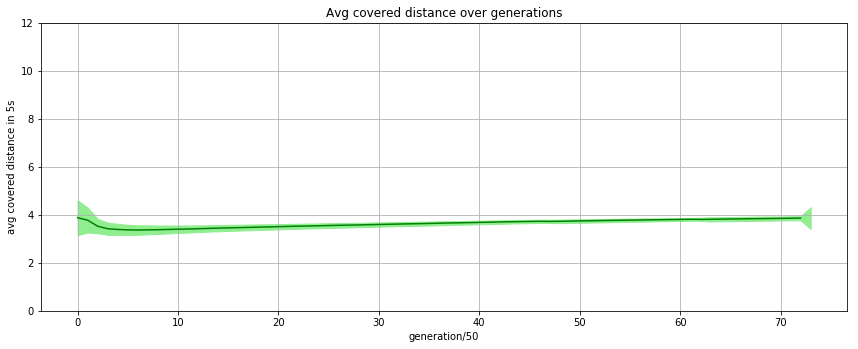

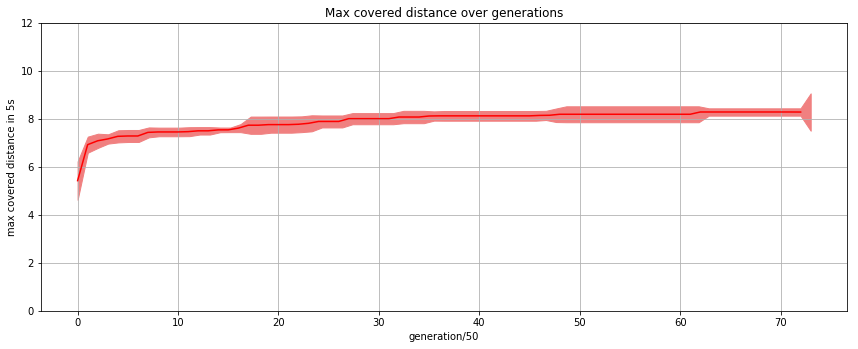

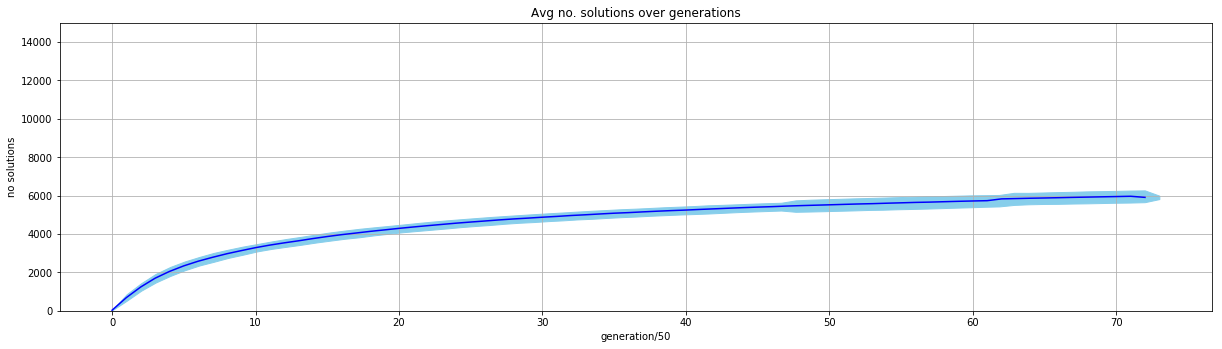

in folder: 1
in folder: 5
in folder: 4
in folder: iterations
in folder: plots
in folder: 2
in folder: 3
in folder: iteresults


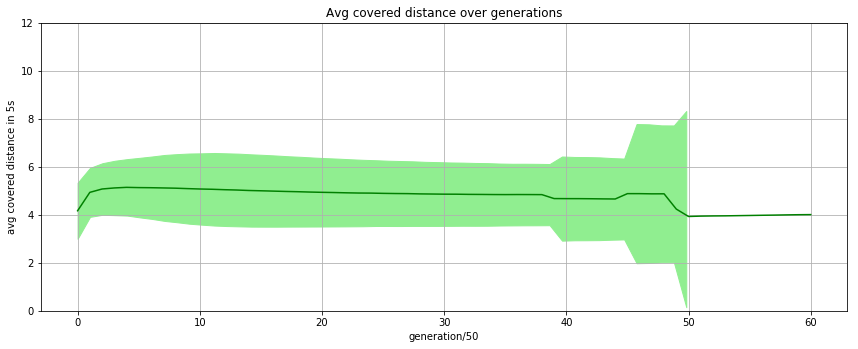

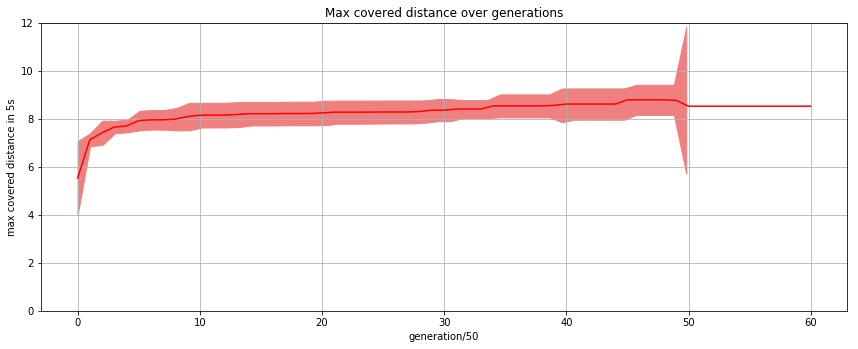

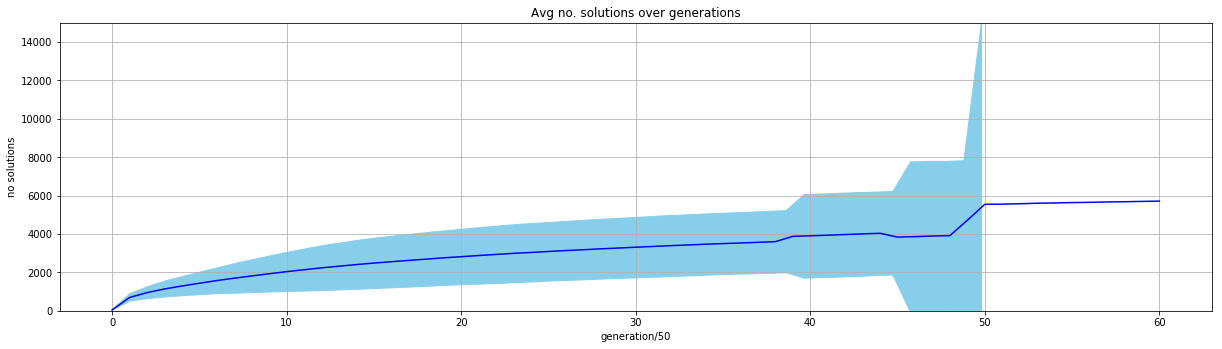

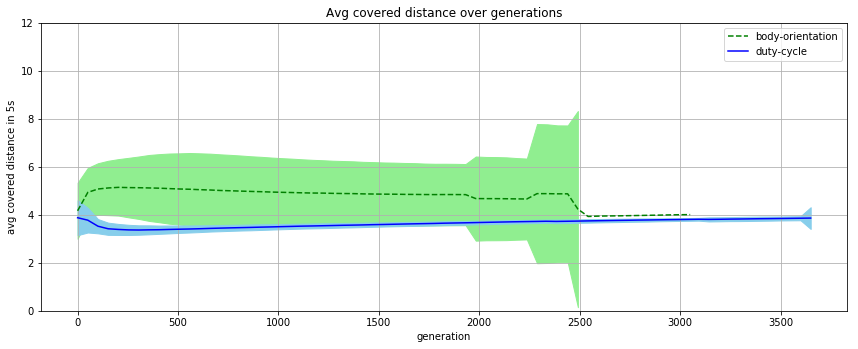

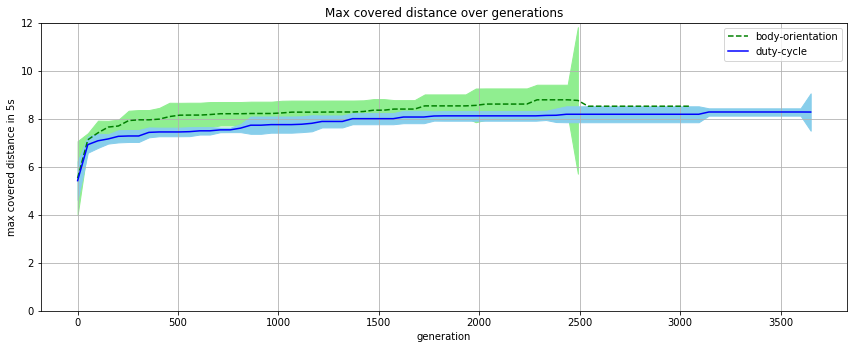

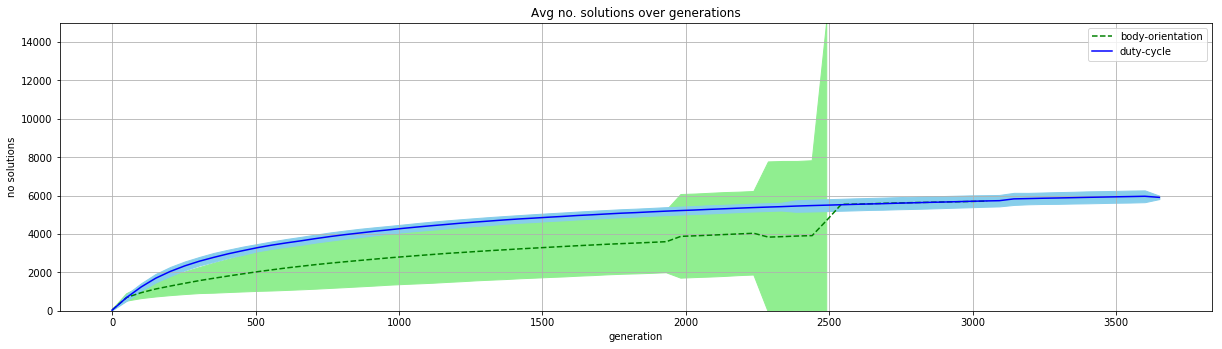

In [15]:
present("dcf0608")

dc_avg_scores = avg_scores
dc_max_scores = max_scores
dc_no_solutions = no_solutions

dc_avg_lower = avg_lower
dc_avg_upper = avg_upper
dc_mean_avg = mean_avg

dc_max_lower = max_lower
dc_max_upper = max_upper
dc_mean_max = mean_max

dc_no_lower = no_lower
dc_no_upper = no_upper
dc_mean_no = mean_no

present("bo0208")

avg_lower, avg_upper, mean_avg = [],[],[]
dc_avg_lower, dc_avg_upper, dc_mean_avg = [],[],[]

for i in range(len(avg_scores)):
    m,l,u = mean_confidence_interval(avg_scores[i])
    avg_lower.append(l)
    avg_upper.append(u)
    mean_avg.append(m)
    
for i in range(len(dc_avg_scores)):
    dc_m, dc_l, dc_u = mean_confidence_interval(dc_avg_scores[i])
    dc_avg_lower.append(dc_l)
    dc_avg_upper.append(dc_u)
    dc_mean_avg.append(dc_m)
    
fig = plt.figure(figsize=(14,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

x = np.linspace(0, len(mean_avg), len(mean_avg))
xx = np.linspace(0, len(dc_mean_avg), len(dc_mean_avg))

x = np.array(x) * 50
xx = np.array(xx) * 50

axes.plot(x, mean_avg, 'g', label="body-orientation", linestyle = "--")
axes.plot(xx, dc_mean_avg, 'b', label="duty-cycle")

plt.title("Avg covered distance over generations", fontsize=20)

axes.fill_between(x, avg_lower, avg_upper, color='lightgreen')
axes.fill_between(xx, dc_avg_lower, dc_avg_upper, color='skyblue')

plt.ylabel("avg covered distance in 5s", fontsize=18)
plt.xlabel("generation", fontsize=18)
axes.set_ylim([0,12])
plt.grid()
plt.legend()
plt.savefig("avgscore.png")
plt.show()

max_lower, max_upper, mean_max = [],[],[]
dc_max_lower, dc_max_upper, dc_mean_max = [],[],[]

for i in range(len(max_scores)):
    m,l,u = mean_confidence_interval(max_scores[i])
    max_lower.append(l)
    max_upper.append(u)
    mean_max.append(m)

for i in range(len(dc_max_scores)):
    dc_m,dc_l,dc_u = mean_confidence_interval(dc_max_scores[i])
    dc_max_lower.append(dc_l)
    dc_max_upper.append(dc_u)
    dc_mean_max.append(dc_m)

fig = plt.figure(figsize=(14,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

x = np.linspace(0, len(mean_max), len(mean_max))
xx = np.linspace(0, len(dc_mean_max), len(dc_mean_max))

x = np.array(x) * 50
xx = np.array(xx) * 50

axes.plot(x, mean_max, 'g', label = "body-orientation", linestyle = "--")
axes.plot(xx, dc_mean_max, 'b', label = "duty-cycle")

axes.fill_between(x, max_lower, max_upper, color='lightgreen')
axes.fill_between(xx, dc_max_lower, dc_max_upper, color='skyblue')

axes.set_ylim([0,12])
plt.title("Max covered distance over generations", fontsize=20)
plt.ylabel("max covered distance in 5s", fontsize=18)
plt.xlabel("generation", fontsize=18)
plt.grid()
plt.legend()
plt.savefig("maxscore.png")
plt.show()

no_lower, no_upper, mean_no = [],[],[]
dc_no_lower, dc_no_upper, dc_mean_no = [],[],[]

for i in range(len(no_solutions)):
    m,l,u = mean_confidence_interval(no_solutions[i])
    no_lower.append(l)
    no_upper.append(u)
    mean_no.append(m)
    
for i in range(len(dc_no_solutions)):
    dc_m,dc_l,dc_u = mean_confidence_interval(dc_no_solutions[i])
    dc_no_lower.append(dc_l)
    dc_no_upper.append(dc_u)
    dc_mean_no.append(dc_m)

fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

x = np.linspace(0, len(mean_no), len(mean_no))
xx = np.linspace(0, len(dc_mean_no), len(dc_mean_no))

x = np.array(x) * 50
xx = np.array(xx) * 50

axes.plot(x, mean_no, 'g', label = "body-orientation", linestyle = "--")
axes.plot(xx, dc_mean_no, 'b', label = "duty-cycle")

axes.fill_between(x, no_lower, no_upper,color='lightgreen')
axes.fill_between(xx, dc_no_lower, dc_no_upper,color='skyblue')

plt.ylabel("no solutions", fontsize=18)
plt.title("Avg no. solutions over generations", fontsize=20)
axes.set_ylim([0,15000])

plt.xlabel("generation", fontsize=18)
plt.grid()
plt.legend()
plt.savefig("numsolutions.png")
plt.show()
